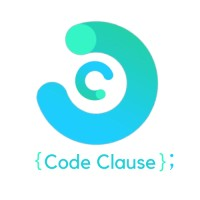

# smart chat bot for clodeclause

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install newspaper3k

In [3]:
#Import libraries 
from newspaper import Article 
import random
import string 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Download the punkt package 
nltk.download('punkt', quiet=True)

True

In [5]:
#Get the article 
article = Article('https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521#:~:text=Chronic%20kidney%20disease%20occurs%20when,High%20blood%20pressure')
article.download()
article.parse()
article.nlp()
corpus = article.text

In [6]:
#Print the articles text 
print(corpus)

I'm Dr. Andrew Bentall, a kidney doctor at Mayo Clinic. I look after patients with kidney disease, either in the early stages, or with more advanced kidney disease considering dialysis and transplantation as treatment options. In this video, we'll cover the basics of chronic kidney disease. What is it? Who gets it? The symptoms, diagnosis and treatment. Whether you are looking for answers for yourself or for someone you love, we're here to give you the best information available.

Chronic kidney disease is a disease characterized by progressive damage and loss of function in the kidneys. It's estimated that chronic kidney disease affects about one in seven American adults. And most of those don't know they have it. Before we get into the disease itself, let's talk a little bit about the kidneys and what they do. Our kidneys play many important roles keeping our bodies in balance. They remove waste and toxins, excess water from the bloodstream, which is carried out of the body in urine.

In [7]:
#Tokenization
text = corpus
sentence_list = nltk.sent_tokenize(text)  # A list of sentences

In [8]:
#Print the list of sentences 
print(sentence_list)

["I'm Dr. Andrew Bentall, a kidney doctor at Mayo Clinic.", 'I look after patients with kidney disease, either in the early stages, or with more advanced kidney disease considering dialysis and transplantation as treatment options.', "In this video, we'll cover the basics of chronic kidney disease.", 'What is it?', 'Who gets it?', 'The symptoms, diagnosis and treatment.', "Whether you are looking for answers for yourself or for someone you love, we're here to give you the best information available.", 'Chronic kidney disease is a disease characterized by progressive damage and loss of function in the kidneys.', "It's estimated that chronic kidney disease affects about one in seven American adults.", "And most of those don't know they have it.", "Before we get into the disease itself, let's talk a little bit about the kidneys and what they do.", 'Our kidneys play many important roles keeping our bodies in balance.', 'They remove waste and toxins, excess water from the bloodstream, which

In [9]:
# A function to return a simple greeting response to the users greetings
def greeting_response(text):
  text = text.lower()

# Bots greeting response
  bot_greetings = ['howdy', 'hi', 'hey', 'hello', 'hola']

#Users greeting
  users_greetings = ['hi', 'hey', 'hello', 'hola', 'greetings', 'wassup']
  for word in text.split():
          for word in users_greetings:
            return random.choice(bot_greetings)

In [10]:
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0, length))

  x = list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > x[list_index[j]]:
        #Swap
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp

  return list_index

In [11]:
#Create the bots response
def bot_response(user_input):
  user_input = user_input.lower()
  sentence_list.append(user_input)
  bot_response = ''
  cm = CounterVectorizer().fit_transform(sentence_list)
  similarity_scores = cosine_similarity(cm[-1], cm)
  similarity_scores_list = similarity_scores.flatten()
  index = index_sort(similarity_scores_list)
  index = index[1:]
  response_flag = 0

  j = 0
  for i in range(len(index)):
    if similarity_scores_list[index[i]] > 0.0:
      bot_response = bot_response+'  '+sentence_list[index[i]]
      response_flag = 1
      j = j+1
    if j > 2:
      break
    
  if response_flag == 0:
    bot_response = bot_response+'  '+"I aplogize, I don't understand."


  sentence_list.remove(user_input)

  return bot_response

In [12]:
#Start the chat
print('CodeClause Bot: I am CodeClause bot or CodeClause for short . I will answer your queries about our services . If you want to exist, then type bye. ')


exit_list = ['exist', 'see you later', 'bye', 'quit', 'break']


while(True):
  user_input = input()
  if user_input.lower() in exit_list:
    print('CodeClause Bot: Chat with you later !')
    break
  else:
    if greeting_response(user_input) != None:
      print('CodeClause Bot: '+greeting_response(user_input))
    else:
      print('CodeClause Bot: '+bot_response(user_input))

CodeClause Bot: I am CodeClause bot or CodeClause for short . I will answer your queries about our services . If you want to exist, then type bye. 
hi
CodeClause Bot: hello
what is your diseases 
CodeClause Bot: hey
what is chronic disesase
CodeClause Bot: hola
hvuycvy
CodeClause Bot: howdy
bye
CodeClause Bot: Chat with you later !
